In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시 


### xlsx 파일을 csv파일로 전환

- 20_21년 자치구별 연료별 자동차 등록현황.xlsx 파일이 xlsx이므로 csv로 변환해서 데이터 추출
- csv 파일로 변환 후 한글 파일이 깨져서, 그 해당 csv파일을 연결프로그램 메모장으로 열어서 
- 인코딩 정보를 ANSI로 전환, 저장 후 다시 csv파일 불러왔음

In [9]:
xlsx = pd.read_excel('./data/20_21년 자치구별 연료별 자동차 등록현황.xlsx')
xlsx.to_csv('./data/20_21년 자치구별 연료별 자동차 등록현황.csv')

In [121]:
df = pd.read_csv('./data/20_21년 자치구별 연료별 자동차 등록현황(편집).csv',encoding='cp949',low_memory=False,skiprows=1)
df.head()

,0,연월,사용본거지시군구,시군구코드,용도,차종종별,연료,건수
0,1,202012,서울특별시 종로구,11110,관용,승용,휘발유,155
1,2,202012,서울특별시 종로구,11110,관용,화물,경유,330
2,3,202012,서울특별시 종로구,11110,관용,화물,기타연료,3
3,4,202012,서울특별시 종로구,11110,관용,특수,기타연료,2
4,5,202012,서울특별시 종로구,11110,자가용,화물,휘발유,71


In [122]:
df.tail()

,0,연월,사용본거지시군구,시군구코드,용도,차종종별,연료,건수
3072,3073,202112,서울특별시 송파구,11710,영업용,승용,수소,2
3073,3074,202112,서울특별시 송파구,11710,영업용,승합,휘발유(무연),1
3074,3075,202112,서울특별시 강동구,11740,자가용,승합,기타연료,70
3075,3076,202112,서울특별시 강동구,11740,자가용,특수,기타연료,27
3076,3077,202112,서울특별시 강동구,11740,영업용,승합,엘피지,179


#### 컬럼 '0' 삭제

In [123]:
del df['0']
df

,연월,사용본거지시군구,시군구코드,용도,차종종별,연료,건수
0,202012,서울특별시 종로구,11110,관용,승용,휘발유,155
1,202012,서울특별시 종로구,11110,관용,화물,경유,330
2,202012,서울특별시 종로구,11110,관용,화물,기타연료,3
3,202012,서울특별시 종로구,11110,관용,특수,기타연료,2
4,202012,서울특별시 종로구,11110,자가용,화물,휘발유,71
...,...,...,...,...,...,...,...
3072,202112,서울특별시 송파구,11710,영업용,승용,수소,2
3073,202112,서울특별시 송파구,11710,영업용,승합,휘발유(무연),1
3074,202112,서울특별시 강동구,11740,자가용,승합,기타연료,70
3075,202112,서울특별시 강동구,11740,자가용,특수,기타연료,27


#### 인덱스를 1부터 설정

In [124]:
df.index = df.index+1
df

,연월,사용본거지시군구,시군구코드,용도,차종종별,연료,건수
1,202012,서울특별시 종로구,11110,관용,승용,휘발유,155
2,202012,서울특별시 종로구,11110,관용,화물,경유,330
3,202012,서울특별시 종로구,11110,관용,화물,기타연료,3
4,202012,서울특별시 종로구,11110,관용,특수,기타연료,2
5,202012,서울특별시 종로구,11110,자가용,화물,휘발유,71
...,...,...,...,...,...,...,...
3073,202112,서울특별시 송파구,11710,영업용,승용,수소,2
3074,202112,서울특별시 송파구,11710,영업용,승합,휘발유(무연),1
3075,202112,서울특별시 강동구,11740,자가용,승합,기타연료,70
3076,202112,서울특별시 강동구,11740,자가용,특수,기타연료,27


### 특정연료만 추출
- 하이브리드 종류에 전기를 충전하는 자동차가 있기 때문에, df1 데이터프레임에는 하이브리드 포함한 데이터프레임입니다.

In [125]:
df_fuel = ['전기','하이브리드(휘발유+전기)','하이브리드(경유+전기)','하이브리드(LPG+전기)','수소']
df1 = df[df['연료'].isin(df_fuel)]
df1

,연월,사용본거지시군구,시군구코드,용도,차종종별,연료,건수
8,202012,서울특별시 종로구,11110,영업용,승용,전기,5
12,202012,서울특별시 중구,11140,관용,승용,전기,124
15,202012,서울특별시 중구,11140,자가용,승용,수소,27
16,202012,서울특별시 중구,11140,영업용,승용,하이브리드(휘발유+전기),238
19,202012,서울특별시 용산구,11170,자가용,승용,전기,412
...,...,...,...,...,...,...,...
3051,202112,서울특별시 강동구,11740,관용,승용,전기,49
3054,202112,서울특별시 강동구,11740,자가용,승합,전기,1
3056,202112,서울특별시 강동구,11740,자가용,화물,전기,93
3058,202112,서울특별시 관악구,11620,영업용,화물,전기,69


#### 연료가 전기, 수소인 data만 추출

In [126]:
df_fuel_2 = ['전기','수소']
df2 = df[df['연료'].isin(df_fuel_2)]
df2

,연월,사용본거지시군구,시군구코드,용도,차종종별,연료,건수
8,202012,서울특별시 종로구,11110,영업용,승용,전기,5
12,202012,서울특별시 중구,11140,관용,승용,전기,124
15,202012,서울특별시 중구,11140,자가용,승용,수소,27
19,202012,서울특별시 용산구,11170,자가용,승용,전기,412
23,202012,서울특별시 용산구,11170,영업용,승용,전기,2
...,...,...,...,...,...,...,...
3051,202112,서울특별시 강동구,11740,관용,승용,전기,49
3054,202112,서울특별시 강동구,11740,자가용,승합,전기,1
3056,202112,서울특별시 강동구,11740,자가용,화물,전기,93
3058,202112,서울특별시 관악구,11620,영업용,화물,전기,69


### 용도가 자가용인 data 추출
- 관광목적이면 용도가 자가용일 가능성이 높을거라 생각하여, 우선 자가용만 추출했습니다.

In [127]:
df_purpose = ['자가용']
df1 = df1[df1['용도'].isin(df_purpose)]
df1

,연월,사용본거지시군구,시군구코드,용도,차종종별,연료,건수
15,202012,서울특별시 중구,11140,자가용,승용,수소,27
19,202012,서울특별시 용산구,11170,자가용,승용,전기,412
20,202012,서울특별시 용산구,11170,자가용,승용,하이브리드(LPG+전기),26
29,202012,서울특별시 종로구,11110,자가용,승용,하이브리드(경유+전기),16
49,202012,서울특별시 성동구,11200,자가용,승용,전기,362
...,...,...,...,...,...,...,...
3037,202112,서울특별시 강남구,11680,자가용,승용,하이브리드(경유+전기),300
3043,202112,서울특별시 송파구,11710,자가용,승용,하이브리드(LPG+전기),96
3044,202112,서울특별시 송파구,11710,자가용,승합,전기,5
3054,202112,서울특별시 강동구,11740,자가용,승합,전기,1


In [128]:
df2 = df2[df2['용도'].isin(df_purpose)]
df2

,연월,사용본거지시군구,시군구코드,용도,차종종별,연료,건수
15,202012,서울특별시 중구,11140,자가용,승용,수소,27
19,202012,서울특별시 용산구,11170,자가용,승용,전기,412
49,202012,서울특별시 성동구,11200,자가용,승용,전기,362
88,202012,서울특별시 종로구,11110,자가용,승용,전기,208
114,202012,서울특별시 종로구,11110,자가용,화물,전기,15
...,...,...,...,...,...,...,...
3024,202112,서울특별시 강동구,11740,자가용,승용,수소,192
3036,202112,서울특별시 강남구,11680,자가용,승용,전기,2314
3044,202112,서울특별시 송파구,11710,자가용,승합,전기,5
3054,202112,서울특별시 강동구,11740,자가용,승합,전기,1


In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 15 to 3056
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연월        321 non-null    int64 
 1   사용본거지시군구  321 non-null    object
 2   시군구코드     321 non-null    int64 
 3   용도        321 non-null    object
 4   차종종별      321 non-null    object
 5   연료        321 non-null    object
 6   건수        321 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 20.1+ KB


## 사용본거지시군구에서  '구'만 따로 추출(df1)
- 사용본거지시군구 에서 구만 따로 추출해서 컬럼 추가 했는데,
- 사용본거지시군구컬럼이 필요없을 거 같아서 뺏는데, 필요하시면 추가하시면 될 거 같습니다.

In [130]:
df1['사용본거지시군구'] = df1['사용본거지시군구'].astype('str')

In [131]:
df_1 = df1['사용본거지시군구'].str.split(' ')
df_1

15       [서울특별시, 중구]
19      [서울특별시, 용산구]
20      [서울특별시, 용산구]
29      [서울특별시, 종로구]
49      [서울특별시, 성동구]
            ...     
3037    [서울특별시, 강남구]
3043    [서울특별시, 송파구]
3044    [서울특별시, 송파구]
3054    [서울특별시, 강동구]
3056    [서울특별시, 강동구]
Name: 사용본거지시군구, Length: 321, dtype: object

In [132]:
df1['구'] = df_1.str.get(1)
df1

,연월,사용본거지시군구,시군구코드,용도,차종종별,연료,건수,구
15,202012,서울특별시 중구,11140,자가용,승용,수소,27,중구
19,202012,서울특별시 용산구,11170,자가용,승용,전기,412,용산구
20,202012,서울특별시 용산구,11170,자가용,승용,하이브리드(LPG+전기),26,용산구
29,202012,서울특별시 종로구,11110,자가용,승용,하이브리드(경유+전기),16,종로구
49,202012,서울특별시 성동구,11200,자가용,승용,전기,362,성동구
...,...,...,...,...,...,...,...,...
3037,202112,서울특별시 강남구,11680,자가용,승용,하이브리드(경유+전기),300,강남구
3043,202112,서울특별시 송파구,11710,자가용,승용,하이브리드(LPG+전기),96,송파구
3044,202112,서울특별시 송파구,11710,자가용,승합,전기,5,송파구
3054,202112,서울특별시 강동구,11740,자가용,승합,전기,1,강동구


In [140]:
df1 = df1[['연월','구','시군구코드','용도','차종종별','연료','건수']]
df1

,연월,구,시군구코드,용도,차종종별,연료,건수
15,202012,중구,11140,자가용,승용,수소,27
19,202012,용산구,11170,자가용,승용,전기,412
20,202012,용산구,11170,자가용,승용,하이브리드(LPG+전기),26
29,202012,종로구,11110,자가용,승용,하이브리드(경유+전기),16
49,202012,성동구,11200,자가용,승용,전기,362
...,...,...,...,...,...,...,...
3037,202112,강남구,11680,자가용,승용,하이브리드(경유+전기),300
3043,202112,송파구,11710,자가용,승용,하이브리드(LPG+전기),96
3044,202112,송파구,11710,자가용,승합,전기,5
3054,202112,강동구,11740,자가용,승합,전기,1


### 사용본거지시군구에서  '구'만 따로 추출(df2)

In [134]:
df2['사용본거지시군구'] = df2['사용본거지시군구'].astype('str')

In [135]:
df_2 = df2['사용본거지시군구'].str.split(' ')
df_2

15       [서울특별시, 중구]
19      [서울특별시, 용산구]
49      [서울특별시, 성동구]
88      [서울특별시, 종로구]
114     [서울특별시, 종로구]
            ...     
3024    [서울특별시, 강동구]
3036    [서울특별시, 강남구]
3044    [서울특별시, 송파구]
3054    [서울특별시, 강동구]
3056    [서울특별시, 강동구]
Name: 사용본거지시군구, Length: 164, dtype: object

In [136]:
df2['구'] = df_2.str.get(1)
df2

,연월,사용본거지시군구,시군구코드,용도,차종종별,연료,건수,구
15,202012,서울특별시 중구,11140,자가용,승용,수소,27,중구
19,202012,서울특별시 용산구,11170,자가용,승용,전기,412,용산구
49,202012,서울특별시 성동구,11200,자가용,승용,전기,362,성동구
88,202012,서울특별시 종로구,11110,자가용,승용,전기,208,종로구
114,202012,서울특별시 종로구,11110,자가용,화물,전기,15,종로구
...,...,...,...,...,...,...,...,...
3024,202112,서울특별시 강동구,11740,자가용,승용,수소,192,강동구
3036,202112,서울특별시 강남구,11680,자가용,승용,전기,2314,강남구
3044,202112,서울특별시 송파구,11710,자가용,승합,전기,5,송파구
3054,202112,서울특별시 강동구,11740,자가용,승합,전기,1,강동구


In [139]:
df2 = df2[['연월','구','시군구코드','용도','차종종별','연료','건수']]
df2

,연월,구,시군구코드,용도,차종종별,연료,건수
15,202012,중구,11140,자가용,승용,수소,27
19,202012,용산구,11170,자가용,승용,전기,412
49,202012,성동구,11200,자가용,승용,전기,362
88,202012,종로구,11110,자가용,승용,전기,208
114,202012,종로구,11110,자가용,화물,전기,15
...,...,...,...,...,...,...,...
3024,202112,강동구,11740,자가용,승용,수소,192
3036,202112,강남구,11680,자가용,승용,전기,2314
3044,202112,송파구,11710,자가용,승합,전기,5
3054,202112,강동구,11740,자가용,승합,전기,1


# 피봇 테이블 만들기
- test_df1: df1을 활용한 수소,전기,하이브리드를 포함한 테이블입니다.

- test_df2: df2을 활용한 수소, 전기를 포함한 테이블입니다.

In [145]:
test_df1 = pd.pivot_table(df1,
                   index=['구','시군구코드'],
                   columns='연료',
                   values='건수',
                   aggfunc='sum')
test_df1

,연료,수소,전기,하이브리드(LPG+전기),하이브리드(경유+전기),하이브리드(휘발유+전기)
구,시군구코드,,,,,
강남구,11680,312,3943,141,456,26430
강동구,11740,319,1344,141,131,11966
강북구,11305,39,450,73,39,3969
강서구,11500,212,1448,196,129,13522
관악구,11620,110,757,183,59,8071
광진구,11215,74,707,98,84,6754
구로구,11530,132,895,179,56,8724
금천구,11545,53,723,115,62,5078
노원구,11350,95,915,189,70,10127


In [146]:
test_df2 = pd.pivot_table(df2,
                   index=['구','시군구코드'],
                   columns='연료',
                   values='건수',
                   aggfunc='sum')
test_df2

,연료,수소,전기
구,시군구코드,,
강남구,11680,312,3943
강동구,11740,319,1344
강북구,11305,39,450
강서구,11500,212,1448
관악구,11620,110,757
광진구,11215,74,707
구로구,11530,132,895
금천구,11545,53,723
노원구,11350,95,915


<AxesSubplot:ylabel='구,시군구코드'>

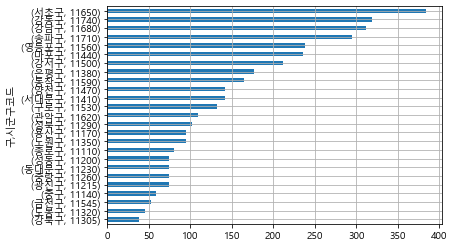

In [155]:
test_df2['수소'].sort_values().plot(kind = 'barh',grid= True)

<AxesSubplot:ylabel='구,시군구코드'>

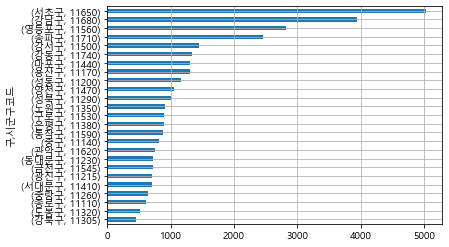

In [156]:
test_df2['전기'].sort_values().plot(kind = 'barh',grid= True)